In [1]:
import cv2
import pandas as pd
import numpy as np
from tensorflow import keras
import glob
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

---
# 장르 데이터 읽기

In [2]:
land_path = '../Data/Artist/genre/resized/landscape/*.jpg'
land_file = [file for file in glob.glob(land_path)]
landCount = len(land_file)
landCount

293

In [3]:
port_path = '../Data/Artist/genre/resized/portrait/*.jpg'
port_file = [file for file in glob.glob(port_path)]
portCount = len(port_file)
portCount

485

In [4]:
# 300개로 갯수 맞추기
port_file_slt = [port_file[id] for id in np.random.randint(0, portCount, size=300)]
portCount = len(port_file_slt)
portCount

300

In [5]:
still_path = '../Data/Artist/genre/resized/still life/*.jpg'
still_file = [file for file in glob.glob(still_path)]
stillCount = len(still_file)
stillCount

290

In [6]:
height = 400
width = 600
colors = 3
numberOfimage = landCount + portCount + stillCount

In [7]:
trainData = np.zeros(numberOfimage * height * width * colors).reshape(-1, height, width, colors)

In [8]:
targetData = np.concatenate([np.zeros(landCount), np.ones(portCount), np.full(stillCount, 3)])
targetData

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [9]:
i = 0
for id in range(150):
    img = np.array(Image.open(land_file[id]), np.int32)
    trainData[i] = img
    i += 1

In [10]:
for id in np.random.randint(0, len(port_file), size=150):
    img = np.array(Image.open(port_file[id]), np.int32)
    trainData[i] = img
    i += 1


In [11]:
for id in np.random.randint(0, len(still_file), size=150):
    img = np.array(Image.open(still_file[id]), np.int32)
    trainData[i] = img
    i += 1


---
# 학습, 검증, 테스트 데이터 분리

In [12]:
train = trainData / 255.0

In [13]:
trainData, testData, trainTarget, testTarget = train_test_split(
    train, targetData, test_size=0.2, random_state=42
)

trainData, valData, trainTarget, valTarget = train_test_split(
    trainData, trainTarget, test_size=0.2, random_state=42
)

In [14]:
print(trainData.shape)
print(trainTarget.shape)
print(valData.shape)
print(valTarget.shape)
print(testData.shape)
print(testTarget.shape)

(564, 400, 600, 3)
(564,)
(142, 400, 600, 3)
(142,)
(177, 400, 600, 3)
(177,)


---
# 딥러닝 모델 생성

In [15]:
model = keras.Sequential()

Metal device set to: Apple M1 Pro

systemMemory: 32.00 GB
maxCacheSize: 10.67 GB



2022-08-04 11:43:58.526996: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-08-04 11:43:58.527176: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [16]:
model.add(
    keras.layers.Conv2D(
        64, 
        kernel_size = 3, 
        activation = 'relu',
        padding = 'same',
        input_shape = (height, width, colors) 
    )
)

In [17]:
model.add(keras.layers.MaxPooling2D(2))

In [18]:
model.add(
    keras.layers.Conv2D(
        64, 
        kernel_size = 3, 
        activation = 'relu',
        padding = 'same',
    )
)

In [19]:
model.add(keras.layers.MaxPooling2D(2))

In [20]:
model.add(
    keras.layers.Conv2D(
        128, 
        kernel_size = 3, 
        activation = 'relu',
        padding = 'same',
    )
)

In [21]:
model.add(keras.layers.MaxPooling2D(2))

In [22]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(200, activation='relu'))
model.add(keras.layers.Dropout(0.4))  # 50% Drop Out
model.add(keras.layers.Dense(200, activation='relu'))
model.add(keras.layers.Dropout(0.4))  # 50% Drop Out
model.add(keras.layers.Dense(3, activation='softmax'))

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 400, 600, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 200, 300, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 200, 300, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 100, 150, 64)     0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 100, 150, 128)     73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 50, 75, 128)      0

In [24]:
# 모델 학습하기
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics ='accuracy'
)

checkpoint_cb = keras.callbacks.ModelCheckpoint("../Data/Artist/model/3_target.h5")
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

history = model.fit(
    trainData, 
    trainTarget, 
    epochs=50, 
    validation_data=[valData, valTarget],
    callbacks=[checkpoint_cb, early_stopping_cb]
)

Epoch 1/50


2022-08-04 11:44:00.394045: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-08-04 11:44:00.661749: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


18/18 [==============================] - ETA: 0s - loss: 1.0728 - accuracy: 0.3227

2022-08-04 11:44:24.533334: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


18/18 [==============================] - 27s 1s/step - loss: 1.0728 - accuracy: 0.3227 - val_loss: 0.5873 - val_accuracy: 0.4859
Epoch 2/50
18/18 [==============================] - 25s 1s/step - loss: 13.7831 - accuracy: 0.3440 - val_loss: 11.3045 - val_accuracy: 0.4859
Epoch 3/50
18/18 [==============================] - 26s 1s/step - loss: 346.0649 - accuracy: 0.3670 - val_loss: 619.5297 - val_accuracy: 0.3380
Epoch 4/50
18/18 [==============================] - 25s 1s/step - loss: 3403.5095 - accuracy: 0.3475 - val_loss: 10806.8076 - val_accuracy: 0.3380
Epoch 5/50
18/18 [==============================] - 25s 1s/step - loss: 29369.5586 - accuracy: 0.3316 - val_loss: 41243.5820 - val_accuracy: 0.3380
Epoch 6/50
18/18 [==============================] - 25s 1s/step - loss: 119272.2422 - accuracy: 0.3599 - val_loss: 90480.8750 - val_accuracy: 0.3380


In [25]:
model.evaluate(testData, testTarget)

6/6 [==============================] - 2s 374ms/step - loss: 0.6175 - accuracy: 0.5198


[0.6175246238708496, 0.5197740197181702]

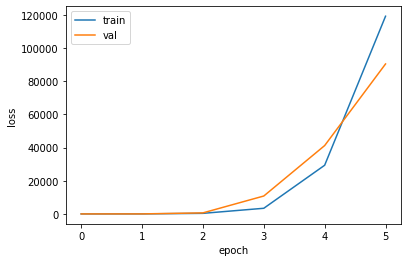

In [26]:
# 시각화 해보기
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()